In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns

matplotlib.font_manager._rebuild()
import numpy as np
from matplotlib.dates import DateFormatter
matplotlib.rcParams['figure.figsize'] = [16,16]

In [4]:
df = pd.read_excel('data.xlsx')

In [21]:
df

,SubID,Temat,Tytuł pracy,Preferowany typ sesji,Osoba prezentująca,Adres e-mail,Autorzy,Abstrakt skrócony,Komentarz / Uwagi,Data nadesłania,Ilość recenzji,Śr. ocen,Status
0,30834600604,"Infrastructure design, safety and ITS",Safety Analysis of RCUT Intersection,OS - oral session,xiaoduan sun,xsun@louisiana.edu,Autor 1 \nImię i nazwisko: xiaoduan sun \nE-ma...,The safety of intersections on a major corrido...,NaN,2018-09-07 19:17,0/0,NaN,Nowy
1,20556401288,"ITS-oriented traffic planning, operations and ...",The electric analogue model of analysis and op...,OS - oral session,Viktor Danchuk,vdanchuk@ukr.net,Autor 1 \nImię i nazwisko: Viktor Danchuk \nE-...,According to the results of the conducted rese...,NaN,2018-10-01 14:12,0/0,NaN,Nowy
2,92503800684,"Real-time traffic control, management and shor...",Spatiotemporal traffic forecasting as a video ...,OS - oral session,Dmitry Pavlyuk,Dmitry.Pavlyuk@tsi.lv,Autor 1 \nImię i nazwisko: Dmitry Pavlyuk \nE-...,Short-term traffic forecasting is an emerging ...,We don't provide bibliographic references in s...,2018-10-02 11:48,0/0,NaN,Nowy
3,71947401267,Demand modelling and travel behaviour under IT...,(Autonomous) Mobility-on-Demand Real-Time Gami...,OS - oral session,Florian Dandl,florian.dandl@unibw.de,Autor 1 \nImię i nazwisko: Florian Dandl \nE-m...,This study is motivated by the recent accompli...,Even though an AI operating policyis the motiv...,2018-10-07 12:06,0/0,NaN,Nowy
4,30834601528,"Automated and intelligent Vehicles, Infrastruc...",Applying traffic conflicts to analyze safety o...,OS - oral session,Andrew Tarko,tarko@purdue.edu,Autor 1 \nImię i nazwisko: Andrew Tarko \nE-ma...,Surrogate measures of safety attract revived i...,This paper may be presented at a special sessi...,2018-10-08 03:06,0/0,NaN,Nowy
5,30834601005,ITS and Smart Cities,Exploring the interactions between autonomous ...,OS - oral session,Agnese Torre,agnese.torre@edu.unige.it,Autor 1 \nImię i nazwisko: Angela Di Febbraro ...,Sustainability is nowadays an overarching conc...,NaN,2018-10-08 11:24,0/0,NaN,Nowy
6,92503801266,"Vehicle-to-X: Vehicle (V2V), Infrastructure (V...",Data fusion based on Car2X information and LiD...,OS - oral session,Sven Eckelmann,eckelmann@htw-dresden.de,Autor 1 \nImię i nazwisko: Sven Eckelmann \nE-...,Future IVI navigation systems will increasingl...,NaN,2018-10-08 13:18,0/0,NaN,Nowy
7,61669201768,Demand modelling and travel behaviour under ITS,Integrating ridesharing services with automate...,OS - oral session,Emely Richter,emely.richter@isv.uni-stuttgart.de,Autor 1 \nImię i nazwisko: Emely Richter \nE-m...,Automated and connected vehicles will change t...,NaN,2018-10-08 13:48,0/0,NaN,Nowy
8,61669201617,Rail Operations and Management,Predictive maintenance of railway infrastructu...,OS - oral session,Carlo Crovetto,carlo.crovetto@ansaldo-sts.com,Autor 1 \nImię i nazwisko: Alice Consilvio \nE...,The condition of railway infrastructure plays ...,NaN,2018-10-08 15:05,0/0,NaN,Nowy
9,92503802169,"ITS, multimodal transportation and freight sys...",An enhanced evolutionary method for routing a ...,OS - oral session,Wassila Aggoune-Mtalaa,wassila.mtalaa@list.lu,Autor 1 \nImię i nazwisko: Dhekra Rezgui \nE-m...,In line with the “2030 Agenda for Sustainable ...,NaN,2018-10-09 15:45,0/0,NaN,Nowy


In [86]:
tematy = list()
for r in df.Temat:
    l = r.split(',')
    for _ in l:
        tematy.append(_.strip())
tematy = pd.Series(tematy)

In [87]:
tematy.value_counts()

management and short-term predictions                         29
operations and management                                     29
ITS-oriented traffic planning                                 29
Real-time traffic control                                     29
Model calibration                                             28
simulation and tools for ITS                                  28
Case studies and assessment of ITS applications               27
Demand modelling and travel behaviour under ITS               24
ITS and Smart Cities                                          24
Automated and intelligent Vehicles                            21
Infrastructure design                                         19
safety and ITS                                                19
ITS and big data                                              16
Infrastructure (V2I) and Grids (V2G)                          15
Vehicle-to-X: Vehicle (V2V)                                   15
ITS                      

In [37]:
data = list()
pierwsi = list()
for l in df.Autorzy:
    h = True
    pierwszy = True
    for author in l.split("\n\n"):
        dane = author.split("\n")[1:]
        if h:
            headers = [r.split(":")[0] for r in dane]
            h = False
        if pierwszy:
            try:
                pierwsi.append([r.split(":")[1] for r in dane])
            except:
                pierwsi.append([r.split(":")[1] for r in dane[:-1]])
            pierwszy = False
        try:
            data.append([r.split(":")[1] for r in dane])
        except:
            data.append([r.split(":")[1] for r in dane[:-1]])
pierwsi = pd.DataFrame(pierwsi, columns = headers)
wszyscy = pd.DataFrame(data, columns = headers)

['Imię i nazwisko', 'E-mail', 'Instytucja / afiliacja', 'Kraj']


In [57]:
pierwsi.groupby('Kraj').size()

Kraj
 Belgia                 1
 Chile                  1
 Chiny                  1
 Estonia                2
 Finlandia              1
 Francja                3
 Grecja                 5
 Hiszpania              2
 Holandia              13
 Indonezja              1
 Kolumbia               1
 Korea Południowa       1
 Luksemburg             5
 Niemcy                20
 Nowa Zelandia          1
 Polska                23
 Stany Zjednoczone      8
 Szwajcaria             3
 Szwecja                2
 Tunezja                1
 Turcja                 4
 Ukraina                3
 Wielka Brytania        5
 Węgry                  1
 Włochy                35
 Łotwa                  2
dtype: int64

In [51]:
pierwsi['Imię i nazwisko'].unique().shape

(133,)

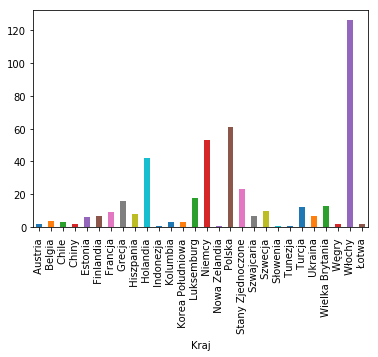

In [46]:
wszyscy.groupby('Kraj').size().plot(kind='bar')

In [56]:
wszyscy.Kraj.unique().shape

(29,)

In [54]:
wszyscy['E-mail'].unique().shape

(367,)

In [64]:
wszyscy['Instytucja / afiliacja'].unique().shape

(188,)

In [72]:
wszyscy.groupby('Instytucja / afiliacja').size().sort_values(ascending=False).head(20)

Instytucja / afiliacja
 TU Delft                                                                        20
 University of Luxembourg                                                        17
 University of Naples "Federico II"                                              15
 Delft University of Technology                                                  12
 Cracow University of Technology                                                 10
 Centre for Research and Technology Hellas - Hellenic Institute of Transport      9
 Niemcy                                                                           8
 Technical University of Munich                                                   8
 Technical University of Istanbul                                                 8
 Università della Calabria                                                        7
 Gdańsk University of Technology                                                  7
 Polytechnic University of Bari                      

Instytucja / afiliacja
 1. Centre for Research and Technology Hellas, Hellenic Institute of Transport; 2. Aristotle University of Thessaloniki, Faculty of Engineering, School of Rural and Surveying Engineering      1
 AGH                                                                                                                                                                                            3
 Aimsun SL                                                                                                                                                                                      1
 Ansaldo STS                                                                                                                                                                                    3
 Argonne National Laboratory                                                                                                                                                                    4
 Austri